In [85]:
from matplotlib import pyplot as plt
import json
import util
import pandas as pd

In [86]:
with open('./data.json') as f:
    # 500ms~
    data: dict = json.load(f)
chunk = util.get_chunks(data, chunksize=1000, chunk_count=1)[0]
df = pd.DataFrame.from_dict(chunk, orient='index')

,assetA,assetB
1577836803078,"{'ask': 7189, 'bid': 7188.89}","{'ask': 7170.25, 'bid': 7169.5}"
1577836806371,"{'ask': 7190.09, 'bid': 7190.05}","{'ask': 7170.25, 'bid': 7169.5}"
1577836806459,"{'ask': 7190.09, 'bid': 7190.05}","{'ask': 7170.5, 'bid': 7169.5}"
1577836806474,"{'ask': 7190.43, 'bid': 7190.05}","{'ask': 7170.5, 'bid': 7169.5}"
1577836806575,"{'ask': 7190.39, 'bid': 7190.05}","{'ask': 7170.5, 'bid': 7169.5}"
...,...,...
1577836986143,"{'ask': 7177.83, 'bid': 7177.77}","{'ask': 7158, 'bid': 7157.75}"
1577836989592,"{'ask': 7178.24, 'bid': 7177.78}","{'ask': 7158, 'bid': 7157.75}"
1577836989694,"{'ask': 7178.24, 'bid': 7177.79}","{'ask': 7158, 'bid': 7157.75}"
1577836989903,"{'ask': 7178.24, 'bid': 7178.09}","{'ask': 7158, 'bid': 7157.75}"


In [ ]:
chunkiter = iter(chunk)
key0 = int(next(chunkiter))
keys = []
assetA_asks = []
assetB_asks = []
assetA_bids = []
assetB_bids = []
for i, (k, v) in enumerate(chunk.items()):
    assetA_ask = v['assetA']['ask']
    assetB_ask = v['assetB']['ask']
    assetA_bid = v['assetA']['bid']
    assetB_bid = v['assetB']['bid']
    norm_key = int(k) - key0
    keys.append(norm_key)
    assetA_asks.append(assetA_ask)
    assetB_asks.append(assetB_ask)
    assetA_bids.append(assetA_bid)
    assetB_bids.append(assetB_bid)

Text(0, 0.5, 'Asset B')

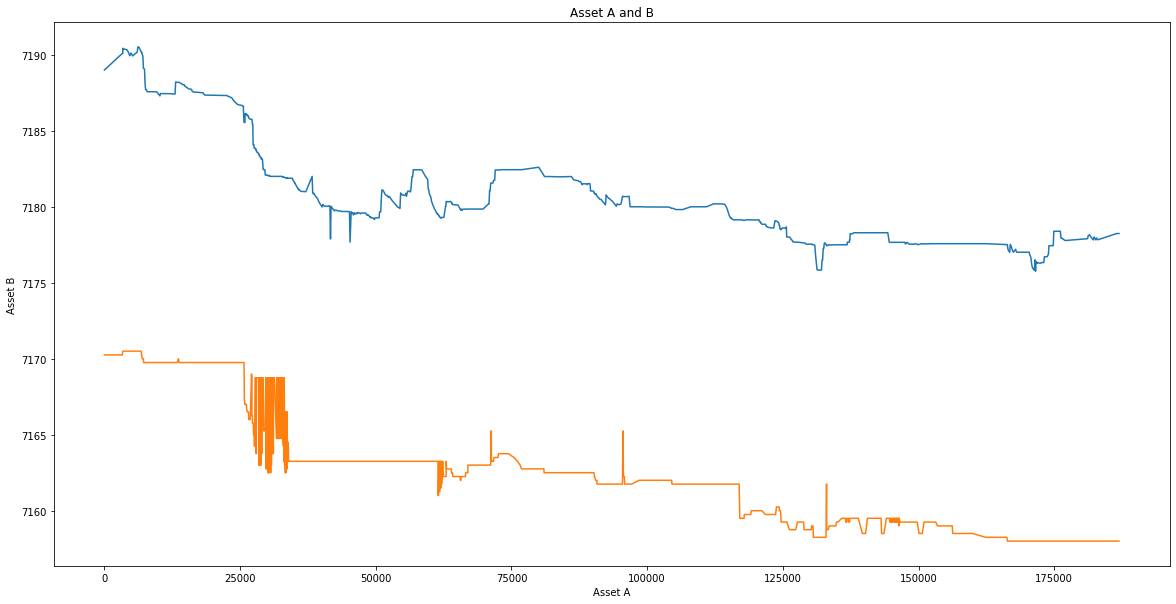

In [100]:
# A vs B | ASKS
plt.figure(figsize=(20,10))
plt.plot(keys, assetA_asks,':r',
         keys, assetB_asks, ':g')
plt.title('A vs B | ASKS')
plt.xlabel('Time')
plt.ylabel('Price')

In [ ]:
# A vs B | BIDS
plt.figure(figsize=(20,10))
plt.plot(keys, assetA_bids,'--r',
         keys, assetB_bids, '--g')
plt.title('A vs B | BIDS')
plt.xlabel('Time')
plt.ylabel('Price')

In [ ]:
# A | Asks vs Bids
plt.figure(figsize=(20,10))
plt.plot(keys, assetA_asks, ':r',
         keys, assetA_bids, '--r')
plt.title('A | Asks vs Bids')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

In [ ]:
# B | Asks vs Bids
plt.figure(figsize=(20,10))
plt.plot(keys, assetB_asks, ':g',
         keys, assetB_bids, '--g')
plt.title('B | Asks vs Bids')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()